In [2]:
using Plots, FFTW

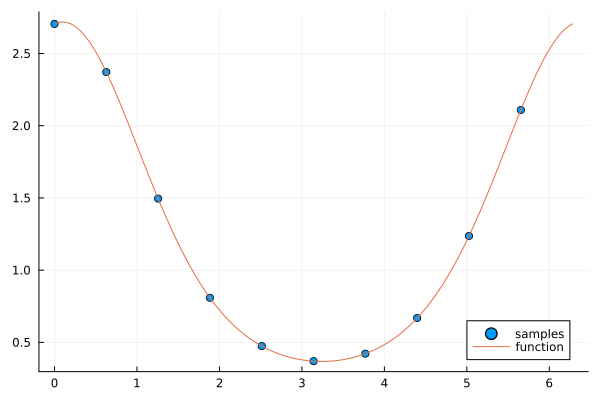

In [15]:
n = 10
f = θ -> exp(cos(θ-0.1))
θ = range(0,2π; length=n+1)[1:n]
g = range(0,2π; length=1000)
scatter(θ, f.(θ); label="samples")
plot!(g, f.(g); label="function")

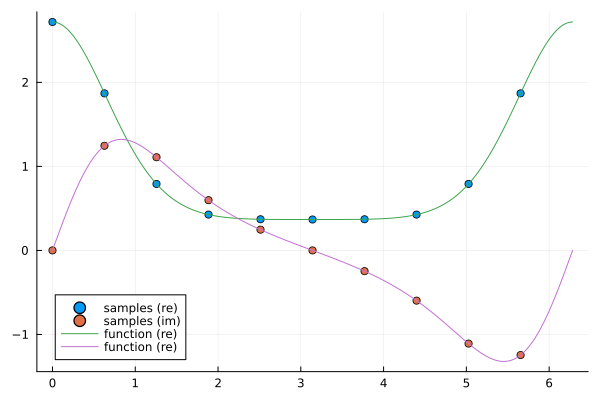

In [20]:
f = θ -> exp(exp(im*θ))
scatter(θ, real.(f.(θ)); label="samples (re)")
scatter!(θ, imag.(f.(θ)); label="samples (im)")
plot!(g, real.(f.(g)); label="function (re)")
plot!(g, imag.(f.(g)); label="function (re)")

In [73]:
fft(f.(θ))/n

5-element Vector{ComplexF64}:
     1.00833360890729 + 7.216449660063518e-17im
    1.001388913941045 - 6.55589843958196e-17im
   0.5001984147860913 - 7.706383888375539e-17im
  0.16669146841455887 + 2.2362584434083242e-17im
 0.041669422410059734 + 4.8095742244856576e-17im

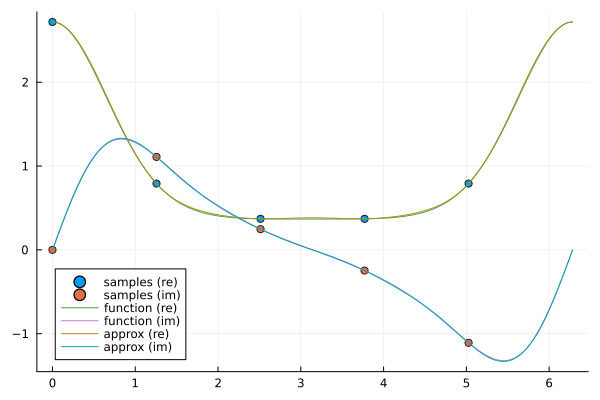

In [74]:
n = 5
θ = range(0,2π; length=n+1)[1:n]

f = θ -> exp(exp(im*θ))
f̂ = fft(f.(θ))/n # [sum(exp(-im*k*θ[j]) * f(θ[j]) for j = 1:n)/n for k=0:n-1]

fₙ = θ -> sum(exp(im*k*θ) * f̂[k+1] for k=0:n-1)

scatter(θ, real.(f.(θ)); label="samples (re)")
scatter!(θ, imag.(f.(θ)); label="samples (im)")
plot!(g, real.(f.(g)); label="function (re)")
plot!(g, imag.(f.(g)); label="function (im)")
plot!(g, real.(fₙ.(g)); label="approx (re)")
plot!(g, imag.(fₙ.(g)); label="approx (im)")


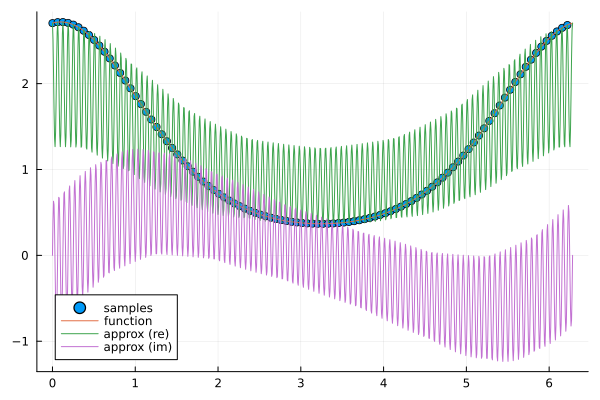

In [42]:
n = 100
f = θ -> exp(cos(θ-0.1))
θ = range(0,2π; length=n+1)[1:n]
g = range(0,2π; length=1000)
scatter(θ, f.(θ); label="samples")
plot!(g, f.(g); label="function")

f̂ = [sum(exp(-im*k*θ[j]) * f(θ[j]) for j = 1:n)/n for k=0:n-1]

fₙ = θ -> sum(exp(im*k*θ) * f̂[k+1] for k=0:n-1)

plot!(g, real.(fₙ.(g)); label="approx (re)")
plot!(g, imag.(fₙ.(g)); label="approx (im)")

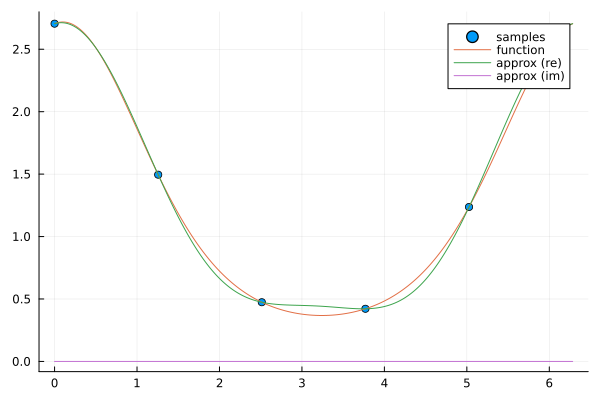

In [47]:
m = 2
n = 2m+1
f = θ -> exp(cos(θ-0.1))
θ = range(0,2π; length=n+1)[1:n]
g = range(0,2π; length=1000)
scatter(θ, f.(θ); label="samples")
plot!(g, f.(g); label="function")


f̂ = [sum(exp(-im*k*θ[j]) * f(θ[j]) for j = 1:n)/n for k=-m:m]

fₙ = θ -> sum(exp(im*k*θ) * f̂[k+m+1] for k=-m:m)

plot!(g, real.(fₙ.(g)); label="approx (re)")
plot!(g, imag.(fₙ.(g)); label="approx (im)")

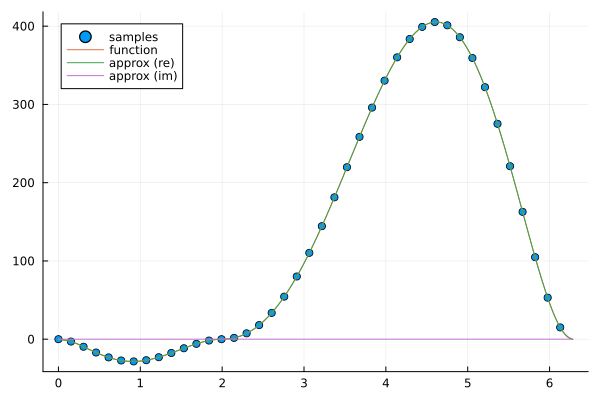

In [56]:
m = 20
n = 2m+1
f = θ -> sign(θ-2)*((θ-2)*θ*(2π-θ))^2
θ = range(0,2π; length=n+1)[1:n]
g = range(0,2π; length=1000)
scatter(θ, f.(θ); label="samples")
plot!(g, f.(g); label="function")


f̂ = [sum(exp(-im*k*θ[j]) * f(θ[j]) for j = 1:n)/n for k=-m:m]

fₙ = θ -> sum(exp(im*k*θ) * f̂[k+m+1] for k=-m:m)

plot!(g, real.(fₙ.(g)); label="approx (re)")
plot!(g, imag.(fₙ.(g)); label="approx (im)")

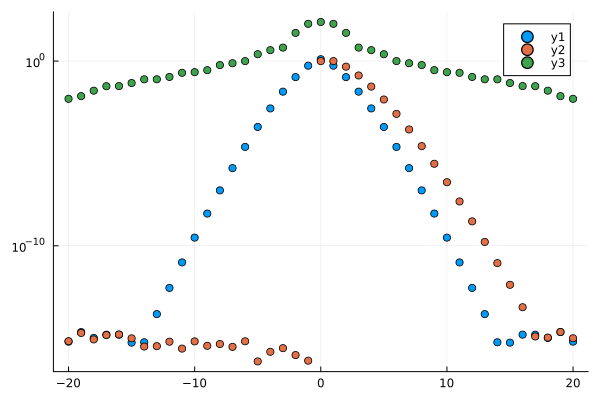

In [69]:
m = 20
n = 2m+1

θ = range(0,2π; length=n+1)[1:n]
g = range(0,2π; length=1000)


f = θ -> exp(cos(θ))
f̂ = [sum(exp(-im*k*θ[j]) * f(θ[j]) for j = 1:n)/n for k=-m:m]
scatter(-m:m, abs.(f̂); yscale=:log10)

f = θ -> exp(exp(im*θ))
f̂ = [sum(exp(-im*k*θ[j]) * f(θ[j]) for j = 1:n)/n for k=-m:m]
scatter!(-m:m, abs.(f̂); yscale=:log10)

f = θ -> sign(θ-2)*((θ-2)*θ*(2π-θ))^2
f̂ = [sum(exp(-im*k*θ[j]) * f(θ[j]) for j = 1:n)/n for k=-m:m]
scatter!(-m:m, abs.(f̂); yscale=:log10)

